# Desain dari Persyaratan Respons Amplitudo
Di fir_design_helper dan iir_design_helper, desain dimulai dengan persyaratan respons amplitudo: frekuensi jalur kritis  filter, frekuensi  jalur berhenti kritis, kenaikan gelombang  jalur laluan, dan penurunan jalur berhenti.
Jumlah tap/koefisien (untuk FIR) atau rangkaian filter (untuk IIR) yang diperlukan untuk memenuhi persyaratan ini ditentukan, dan koefisien filter direpresentasikan sebagai larik b untuk FIR dan larik b untuk IIR  b dan a, di mana baris-barisnya berisi kaskade yang sesuai dari topologi orde kedua dari filter IIR.
# Desain Filter FIR Fasa Linier
Fokus utama  modul ini adalah menambahkan kemampuan  merancang filter FIR fase linier berdasarkan persyaratan respons amplitudo yang mudah digunakan. Kebanyakan desain filter digital didasarkan pada keinginan untuk memperkirakan filter yang ideal. Ingatlah bahwa filter yang ideal akan melewatkan sinyal pada frekuensi tertentu dan memblokir sinyal pada frekuensi lain. Untuk filter analog dan digital, pengembang dapat memilih dari berbagai teknik perkiraan. Untuk filter digital, teknik aproksimasi termasuk dalam kategori IIR atau FIR. Ada dua teknik umum untuk merancang filter FIR: memotong dan melihat respon impuls filter yang ideal, dan  pendekatan equiripple yang optimal. Pendekatan berbasis pengambilan sampel frekuensi juga umum dilakukan, tetapi scipy.signal mendukung ketiganya, namun kami tidak akan mempertimbangkannya di sini. Desain filter biasanya dimulai dengan menentukan respons frekuensi yang diinginkan. Respon frekuensi filter dapat dinyatakan dalam banyak cara, namun yang paling umum adalah respon amplitudonya.
fir_design_helper.py menyediakan 10  desain filter dan  fungsi plot. Empat fungsi untuk merancang filter FIR berbasis jendela Kaiser dan empat fungsi untuk merancang filter FIR berbasis Equiripple. Dari delapan yang baru saja dijelaskan, semuanya menerima persyaratan respons amplitudo dan mengembalikan sekumpulan koefisien.
 Dua dari 10 fungsi filter adalah fungsi scipy.signal signal.firwin() untuk menentukan satu frekuensi kritis (lowpass) atau dua (bandpass) untuk merancang filter dengan urutan tertentu. Fungsi pembungkus ini menyetel tipe jendela ke nilai default firwin oleh Hann (Hanning).

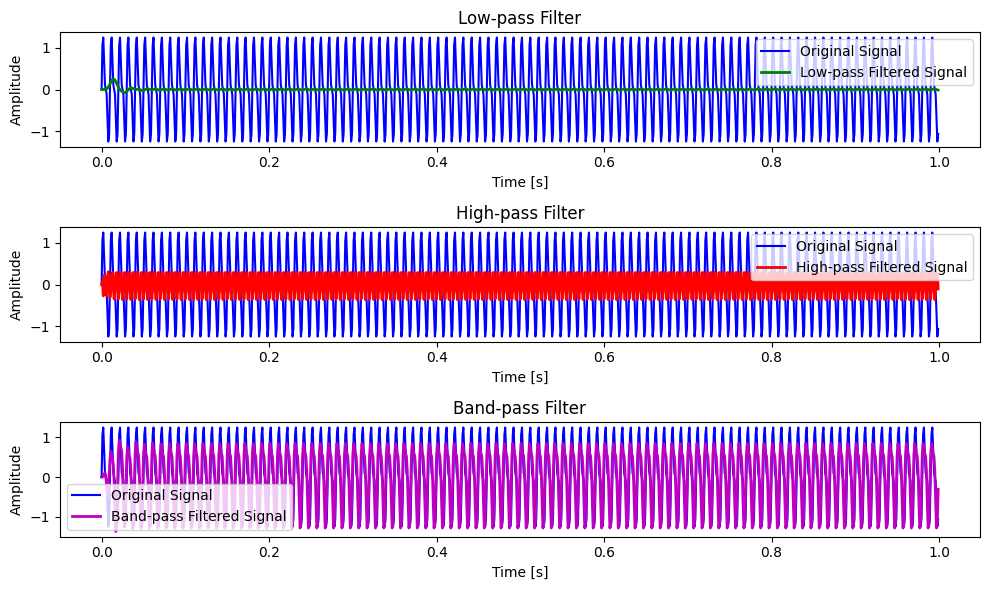

In [2]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a

def butter_filter(data, cutoff, fs, btype='low', order=5):
    b, a = butter(order, cutoff, btype=btype, fs=fs)
    y = lfilter(b, a, data)
    return y

# Parameters
order = 6
fs = 1000.0  # sample rate, Hz
t = np.linspace(0, 1, int(fs), endpoint=False)
data = np.sin(2*np.pi*100*t) + 0.5*np.sin(2*np.pi*200*t)

# Filter cutoff frequencies
cutoff_low = 50.0  # Low-pass cutoff frequency
cutoff_high = 200.0  # High-pass cutoff frequency

# Apply filters
filtered_low = butter_filter(data, cutoff_low, fs, btype='low', order=order)
filtered_high = butter_filter(data, cutoff_high, fs, btype='high', order=order)
filtered_band = butter_filter(data, [cutoff_low, cutoff_high], fs, btype='band', order=order)

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, data, 'b-', label='Original Signal')
plt.plot(t, filtered_low, 'g-', linewidth=2, label='Low-pass Filtered Signal')
plt.title('Low-pass Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, data, 'b-', label='Original Signal')
plt.plot(t, filtered_high, 'r-', linewidth=2, label='High-pass Filtered Signal')
plt.title('High-pass Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, data, 'b-', label='Original Signal')
plt.plot(t, filtered_band, 'm-', linewidth=2, label='Band-pass Filtered Signal')
plt.title('Band-pass Filter')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()